In [14]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob
import torch
from torch.utils.data import Dataset

In [15]:

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])
    
print(os.getcwd())
    
directory = '.\data'

C:\Users\jcremaldi\programming\DiplomatPredictiveAnalysisLocal\ActiveProjects\IBM


In [16]:
negative='Negative'
negative_file_path=os.path.join(directory,negative)
negative_file_path

os.listdir(negative_file_path)[0:3]
print([os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path)][0:3])
print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['.\\data\\Negative\\00001.jpg', '.\\data\\Negative\\00002.jpg', '.\\data\\Negative\\00003.jpg']
True
False


['.\\data\\Negative\\00001.jpg',
 '.\\data\\Negative\\00002.jpg',
 '.\\data\\Negative\\00003.jpg']

In [17]:
positive='Positive'
positive_file_path=os.path.join(directory,positive)
positive_file_path

os.listdir(positive_file_path)[0:3]
print([os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path)][0:3])
print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
positive_files.sort()
positive_files[0:3]

['.\\data\\Positive\\00001.jpg', '.\\data\\Positive\\00002.jpg', '.\\data\\Positive\\00003.jpg']
True
False


['.\\data\\Positive\\00001.jpg',
 '.\\data\\Positive\\00002.jpg',
 '.\\data\\Positive\\00003.jpg']

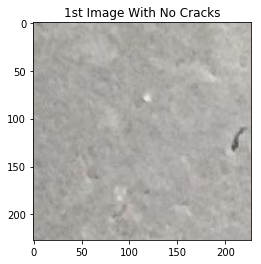

In [18]:
image1 = Image.open(negative_files[0])
plt.imshow(image1)
plt.title("1st Image With No Cracks")
plt.show()

In [19]:
number_of_samples = int(len(negative_files) + len(positive_files))
number_of_samples

40000

In [20]:
Y=torch.zeros([number_of_samples])
Y=Y.type(torch.LongTensor)
Y.type()
Y[::2]=1
Y[1::2]=0

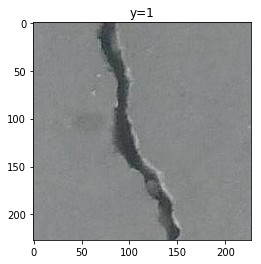

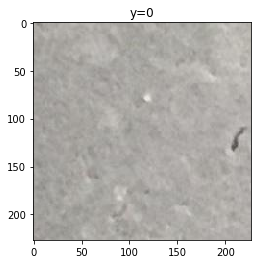

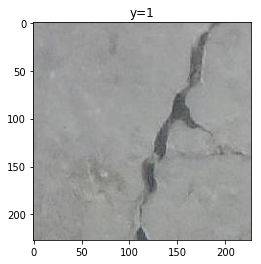

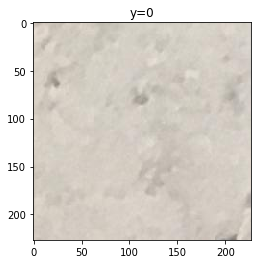

In [25]:
all_files = [None] * number_of_samples
all_files[::2] = positive_files
all_files[1::2] = negative_files

for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y="+str(y.item()))
    plt.show()

In [26]:
train=False

if train:
    all_files=all_files[0:30000]
    Y=Y[0:30000]

else:
    all_files=all_files[30000:]
    Y=Y[30000:]

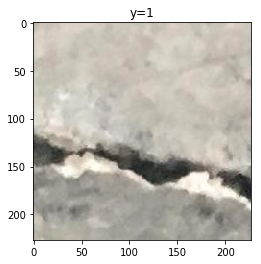

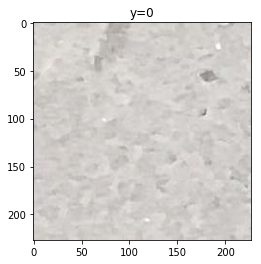

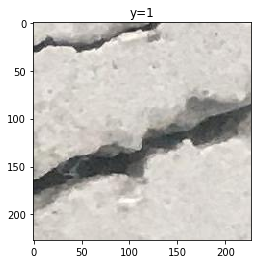

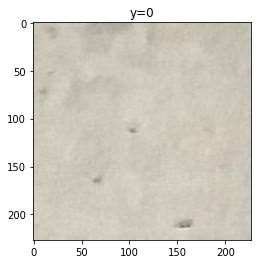

In [27]:
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y="+str(y.item()))
    plt.show()

In [44]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory = '.\data'
        positive = 'Positive'
        negative = 'Negative'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()

        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        
        image=Image.open(self.all_files[idx])
        y=self.Y[idx]
          
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

10000


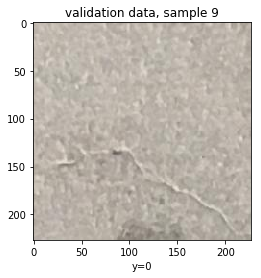

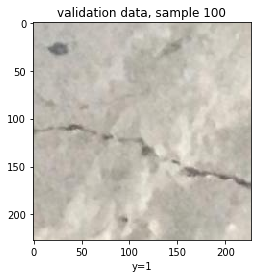

In [48]:
dataset_val = Dataset(train=False)
Y = dataset_val.Y


print(len(Y))
samples = [9,100]

for sample in samples:
    plt.imshow(dataset_val[sample][0])
    plt.xlabel("y="+str(dataset_val[sample][1].item()))
    plt.title("validation data, sample {}".format(int(sample)))
    plt.show()

30000


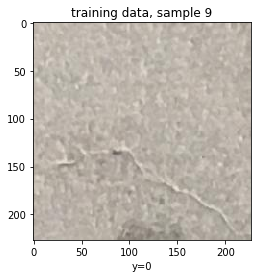

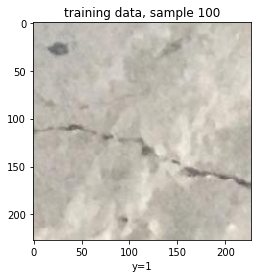

In [63]:

data_set = Dataset(train=True)
Y = dataset.Y


print(len(Y))
samples = [9,100]

for sample in samples:
    plt.imshow(data_set[sample][0])
    plt.xlabel("y="+str(data_set[sample][1].item()))
    plt.title("training data, sample {}".format(int(sample)))
    plt.show()

In [64]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
from torch import optim 

In [65]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory = '.\data'
        positive = 'Positive'
        negative = 'Negative'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files=self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)    
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        
        image=Image.open(self.all_files[idx])
        y=self.Y[idx]
          
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [66]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
# transforms.ToTensor()
#transforms.Normalize(mean, std)
#transforms.Compose([])

transform =transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean, std)])

In [67]:
dataset_train=Dataset(transform=transform,train=True)
dataset_val=Dataset(transform=transform,train=False)

In [68]:
dataset_train[0][0].shape

torch.Size([3, 227, 227])

In [69]:
size_of_image=3*227*227
size_of_image

154587

Create a custom module for Softmax for two classes,called model. The input size should be the size_of_image, you should record the maximum accuracy achieved on the validation data for the different epochs. For example if the 5 epochs the accuracy was 0.5, 0.2, 0.64,0.77, 0.66 you would select 0.77.

Train the model with the following free parameter values:

Parameter Values

* learning rate:0.1
* momentum term:0.1
* batch size training:1000
* Loss function:Cross Entropy Loss
* epochs:5
* set: torch.manual_seed(0)

In [70]:
torch.manual_seed(0)

In [71]:
# Build Softmax Classifier technically you only need nn.Linear

model = nn.Sequential(nn.Linear(size_of_image, 2))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-1.9042e-05,  1.3644e-03, -2.0933e-03,  ..., -2.2041e-03,
                       -1.6752e-03, -6.4412e-04],
                      [ 5.9658e-04,  1.8556e-03, -9.0110e-04,  ..., -3.9324e-04,
                       -4.3716e-04, -3.5319e-04]])),
             ('0.bias', tensor([-0.0004, -0.0008]))])

In [72]:
# Create criterion function, optimizer, and dataloader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])












criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.1)
trainloader = DataLoader(dataset = data_set, batch_size = 1000)



In [73]:
# Train the model



LOSS = []
def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()

train_model(5)

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.JpegImagePlugin.JpegImageFile'>